# Title: WES_237A_lab2_report
# PID: A69028485
# Name: William Wei
# GitHub username: William Lien Chin Wei
# Email (registered with GitHub): williams19834812@gmail.com

# Lab work part 1

### Shared C++ Library
1.In ‘Lab2’, create a new text file (New -> Text File) and rename it to ‘main.c’ <br>
![image.png](attachment:image.png)

2.Add the following code to ‘main.c’: <br>


#include <unistd.h>
   
int myAdd(int a, int b){ <br>
&ensp; sleep(1); <br>
&ensp;  return a+b; <br>
} <br>

<font color='blue'>
3.Following the function above, write another function to multiply two integers together. Copy your code below. <br>

int myMulti(int a, int b){ <br>
 &ensp; sleep(1); <br>
 &ensp; return a*b; <br>
}
</font>
<br>

4.Save main.c <br>

5.In Jupyter, open a terminal window (New -> Terminal) and change directories (cd) to ‘Lab2’ directory. <br>

6.Compile your ‘main.c’ code as a shared library. <br>

gcc -c -Wall -Werror -fpic main.c <br>
gcc -shared -o libMyLib.so main.o <br>


7.Download ‘ctypes_example.ipynb’ from here and upload it to the Lab2 directory. <br>
8.Go through each of the code cells to understand how we interface between Python and our C code <br>

In [11]:
import ctypes                                # import ctypes interface for Python

In [12]:
_libInC = ctypes.CDLL('./libMyLib.so')       # import our shared library

In [13]:
_libInC.myAdd(3, 5)                          # cal C function, myAdd(a, b).

8

In [14]:
def addC(a,b):
    return _libInC.myAdd(a,b)                # wrap this C function in a Python function for ease of use.

In [15]:
addC(10, 202)

212

<font color='blue'>
9.Write another Python function to wrap your multiplication function written above in step 3. Copy your code below.
</font>
<br>

## Multiply
Following the code for your add function, write a Python wrapper function to call your C multiply code

In [16]:
a, b = 9, 8
_libInC.myMulti(a, b)                          # cal C function, myAdd(a, b).

72

In [17]:
def multiC(a,b):
    return _libInC.myMulti(a,b)                # Python wrapper function

In [18]:
multiC(a, b)

72

To summarize, we created a C shared library and then called the C function from Python

# Lab work part 2
### Multiprocessing
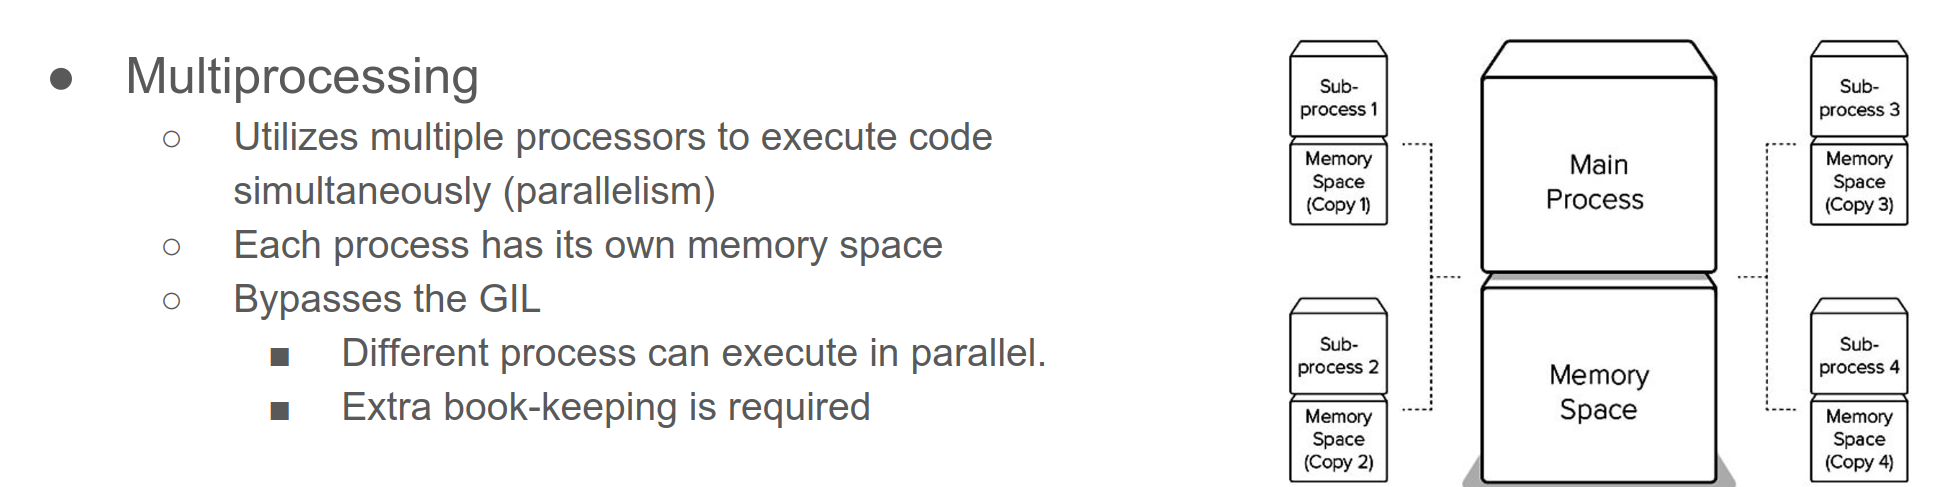

1.Download ‘multiprocess_example.ipynb’ from here and upload it into your ‘Lab2’ directory. <br>
2.Go through the documentation (and comments) and answer the following question <br>

In [19]:
#importing required libraries and our shared library
import ctypes
import multiprocessing
import os
import time                               # provides various time-related functions

In [20]:
_libInC = ctypes.CDLL('./libMyLib.so')

In [21]:
def addC_print(_i, a, b, time_started):
    val = ctypes.c_int32(_libInC.myAdd(a, b)).value #cast the result to a 32 bit integer
    end_time = time.time()
    print('CPU_{} Add: {} in {}'.format(_i, val, end_time - time_started))
    
def multC_print(_i, a, b, time_started):
    val = ctypes.c_int32(_libInC.myMulti(a, b)).value #cast the result to a 32 bit integer
    end_time = time.time()
    print('CPU_{} Multiply: {} in {}'.format(_i, val, end_time - time_started))

In [23]:
procs = [] # a future list of all our processes

# Launch process1 on CPU0
p1_start = time.time()   # Return the time in seconds since the epoch, January 1, 1970, 00:00:00 (UTC), as a floating point number
p1 = multiprocessing.Process(target=addC_print, args=(0, 3, 5, p1_start)) # creating process, the first arg defines which CPU to run the 'target' on
os.system("taskset -p -c {} {}".format(0, p1.pid)) #Execute the command (a string) in a subshell,  taskset is an os command to pin the process to a specific CPU
# tasket -c [cpu core(s) to use] [proccess_id]
p1.start() # start the process
procs.append(p1)

# Launch process2 on CPU1
p2_start = time.time()
p2 = multiprocessing.Process(target=multC_print, args=(1, 3, 5, p2_start)) # the first arg defines which CPU to run the 'target' on
os.system("taskset -p -c {} {}".format(1, p2.pid)) # taskset is an os command to pin the process to a specific CPU
p2.start() # start the process
procs.append(p2)

p1Name = p1.name # get process1 name
p2Name = p2.name # get process2 name

# Here we wait for process1 to finish then wait for process2 to finish
p1.join() # wait for process1 to finish
print('Process 1 with name, {}, is finished'.format(p1Name))

p2.join() # wait for process2 to finish
print('Process 2 with name, {}, is finished'.format(p2Name))
print(procs)

CPU_1 Multiply: 15 in 1.0458498001098633
CPU_0 Add: 8 in 5.049315690994263
Process 1 with name, Process-3, is finished
Process 2 with name, Process-4, is finished
[<Process(Process-3, stopped)>, <Process(Process-4, stopped)>]


<font color='blue'>
$\textbf{a}$. Why does the ‘Process-#’ keep incrementing as you run the code cell over and over? <br>

Ans: Because the OS of PYNQ is a variation of Linux, the PID by default increment the process-#. Therefore, each time running above cell, command "multiprocessing.Process" increments Process-#. <br>

$\textbf{b}$. Which line assigns the processes to run on a specific CPU? <br>

Ans: The line "p1 = multiprocessing.Process(target=addC_print, args=(0, 3, 5, p1_start))" assigns the process to a specific CPU, e.g., CPU 0 here.
</font>

3.In ‘main.c’ change the ‘sleep()’ command and recompile the library with the commands above.<br> 
Also reload the jupyter notebook with the ⟳ symbol and re-run all cells. Try sleeping the functions for various, different times (or the same).

<font color='blue'>
$\textbf{a}$. Explain the difference between the results of the ‘Add’ and ‘Multiply’ functions and when the processes are finished. <br>

Ans: After changing the amount of sleep time to 5 sec in myAdd, the output above shows that CPU_0 is running slower than myMulti as shown in the ouput of the following cells.
</font>
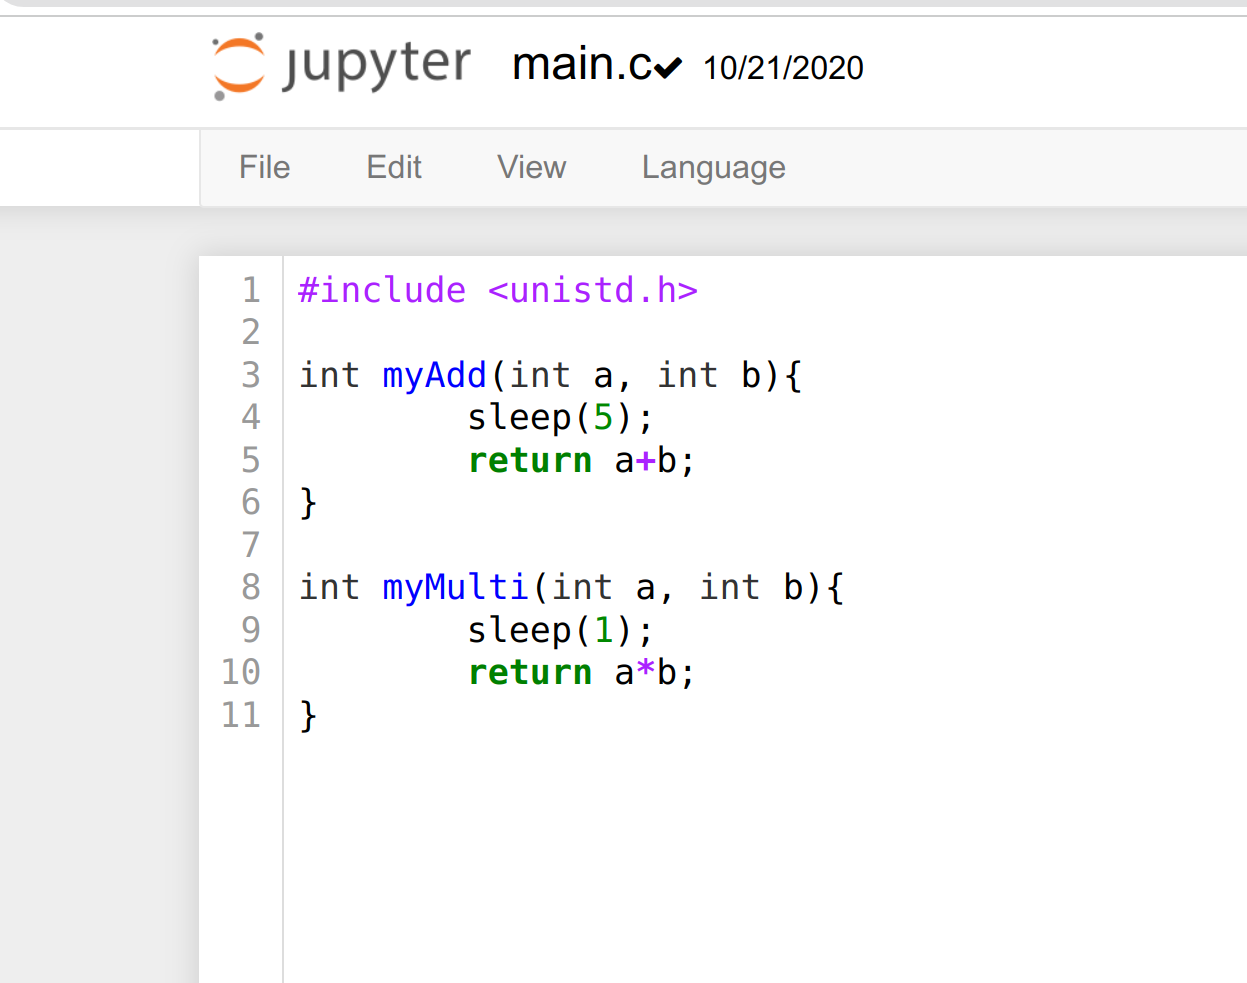

In [29]:
_libInC = ctypes.CDLL('./libMyLib.so')

In [30]:
def addC_print(_i, a, b, time_started):
    val = ctypes.c_int32(_libInC.myAdd(a, b)).value #cast the result to a 32 bit integer
    end_time = time.time()
    print('CPU_{} Add: {} in {}'.format(_i, val, end_time - time_started))
    
def multC_print(_i, a, b, time_started):
    val = ctypes.c_int32(_libInC.myMulti(a, b)).value #cast the result to a 32 bit integer
    end_time = time.time()
    print('CPU_{} Multiply: {} in {}'.format(_i, val, end_time - time_started))

In [31]:
procs = [] # a future list of all our processes

# Launch process1 on CPU0
p1_start = time.time()
p1 = multiprocessing.Process(target=addC_print, args=(0, 3, 5, p1_start)) # the first arg defines which CPU to run the 'target' on
os.system("taskset -p -c {} {}".format(0, p1.pid)) # taskset is an os command to pin the process to a specific CPU
p1.start() # start the process
procs.append(p1)

# Launch process2 on CPU1
p2_start = time.time()
p2 = multiprocessing.Process(target=multC_print, args=(1, 3, 5, p2_start)) # the first arg defines which CPU to run the 'target' on
os.system("taskset -p -c {} {}".format(1, p2.pid)) # taskset is an os command to pin the process to a specific CPU
p2.start() # start the process
procs.append(p2)

p1Name = p1.name # get process1 name
p2Name = p2.name # get process2 name

# Here we wait for process1 to finish then wait for process2 to finish
p1.join() # wait for process1 to finish
print('Process 1 with name, {}, is finished'.format(p1Name))

p2.join() # wait for process2 to finish
print('Process 2 with name, {}, is finished'.format(p2Name))
print(procs)

CPU_1 Multiply: 15 in 1.0581862926483154
CPU_0 Add: 8 in 5.048292875289917
Process 1 with name, Process-9, is finished
Process 2 with name, Process-10, is finished
[<Process(Process-9, stopped)>, <Process(Process-10, stopped)>]


4.Continue to the lab work section. Here we are going to do the following

In [32]:
#importing required libraries and our shared library
import ctypes
import multiprocessing
import os
import time

# Create a multiprocessing array object with 2 entries of integer type.
#multiprocessing.Array()
# Launch 1 process to compute addition and 1 process to compute multiplication.
# Assign the results to separate positions in the array.
# Process 1 (add) is stored in index 0 of the array (array[0])
# Process 2 (mult) is stored in index 1 of the array (array[1])
# Print the results from the array.
# There are 4 TODO comments that must be completed

In [33]:
def addC_no_print(_i, a, b, returnValus):
    '''
    Params:
      _i   : Index of the process being run (0 or 1)
      a, b : Integers to add
      returnValues : Multiprocessing array in which we will store the result at index _i
    '''
    val = ctypes.c_int32(_libInC.myAdd(a, b)).value
    returnValus[0] = val # TODO: add code here to pass val to correct position returnValues
    
def multC_no_print(_i, a, b, returnValus):
    '''
    Params:
      _i   : Index of the process being run (0 or 1)
      a, b : Integers to multiply
      returnValues : Multiprocessing array in which we will store the result at index _i
    '''
    val = ctypes.c_int32(_libInC.myMulti(a, b)).value
    returnValus[1] = val # TODO: add code here to pass val to correct position of returnValues
    
procs = []

# TODO: define returnValues here. Check the multiprocessing docs to see 
# about initializing an array object for 2 processes. 
# Note the data type that will be stored in the array
returnValues = multiprocessing.Array('i', [0, 0])


p1 = multiprocessing.Process(target=addC_no_print, args=(0, 3, 5, returnValues)) # the first arg defines which CPU to run the 'target' on
os.system("taskset -p -c {} {}".format(0, p1.pid)) # taskset is an os command to pin the process to a specific CPU
p1.start() # start the process
procs.append(p1)

p2 = multiprocessing.Process(target=multC_no_print, args=(1, 3, 5, returnValues)) # the first arg defines which CPU to run the 'target' on
os.system("taskset -p -c {} {}".format(1, p2.pid)) # taskset is an os command to pin the process to a specific CPU
p2.start() # start the process
procs.append(p2)

# Wait for the processes to finish
for p in procs:
    pName = p.name # get process name
    p.join() # wait for the process to finish
    print('{} is finished'.format(pName))

# TODO print the results that have been stored in returnValues
print(f'returnValues[0] is {returnValues[0]}')
print(f'returnValues[1] is {returnValues[1]}')

Process-11 is finished
Process-12 is finished
returnValues[0] is 8
returnValues[1] is 15


<font color='blue'>
5. Answer the following question
Explain, in your own words, what shared memory is relating to the code in this exercise. <br>
Ans: The returnValues array here is related to the shared memory, where data processed on different cores can be jointly accessed using shared memory. <br>
</font>

# Lab work part 3
### Threading
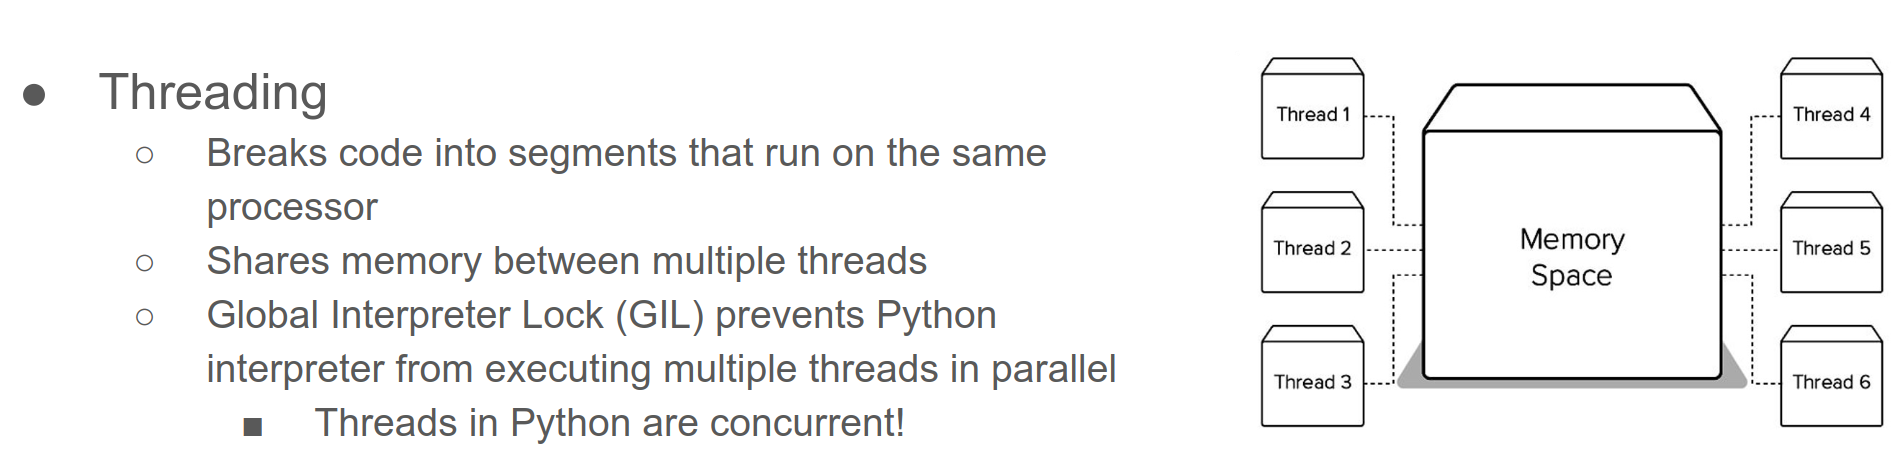
1.Download ‘threading_example.ipynb’ from here and upload it into your ‘Lab2’ directory.

In [34]:
import threading
import time
from pynq.overlays.base import BaseOverlay
base = BaseOverlay("base.bit")

In [35]:
def blink(t, d, n):
    '''
    Function to blink the LEDs
    Params:
      t: number of times to blink the LED
      d: duration (in seconds) for the LED to be on/off
      n: index of the LED (0 to 3)
    '''
    for i in range(t):
        base.leds[n].toggle()
        time.sleep(d)
    base.leds[n].off()

def worker_t(_l, num):
    '''
    Worker function to try and acquire resource and blink the LED
    _l: threading lock (resource)
    num: index representing the LED and thread number.
    '''
    for i in range(4):
        using_resource = _l.acquire(True)     #block until the lock is unlocked, then set it to locked and return True.
        print("Worker {} has the lock".format(num))
        blink(50, 0.02, num)
        _l.release()
        time.sleep(0) # yeild
    print("Worker {} is done.".format(num))
        
# Initialize and launch the threads
threads = []
fork = threading.Lock()
for i in range(2):
    t = threading.Thread(target=worker_t, args=(fork, i))
    threads.append(t)
    t.start()

for t in threads:
    name = t.getName()
    t.join()
    print('{} joined'.format(name))

Worker 0 has the lock
Worker 1 has the lock
Worker 0 has the lock
Worker 1 has the lock
Worker 0 has the lock
Worker 1 has the lock
Worker 0 has the lock
Worker 0 is done.Worker 1 has the lock

Thread-5 joined
Worker 1 is done.
Thread-6 joined


<font color='blue'>
2 Go through the documentation and code for ‘Two threads, single resource’ and answer the following questions <br>
<br>
$\textbf{a}$ What line launches a thread and what function is the thread executing?
<br>
Ans: Line "t = threading.Thread(target=worker_t, args=(fork, i))" launches a thread, and "t.start()" is the thread executing function.
<br><br>

$\textbf{b}$ What line defines a mutual resource? How is it accessed by the thread function? 
<br>
Ans: Line "fork = threading.Lock()" defines a mutual resource, e.g., a lock, and "using_resource = _l.acquire(True)" access the mutual resource. 
<br>

</font>

### Two threads, two resource

In [ ]:
def worker_t(_l0, _l1, num):
    '''
    Worker function to try and acquire resource and blink the LED
    _l0: threading lock0 (resource0)
    _l1: threading lock1 (resource1)
    num: index representing the LED and thread number.
    init: which resource this thread starts with (0 or 1)
    '''
    using_resource0 = False
    using_resource1 = False
        
    for i in range(4):
        using_resource0 = _l0.acquire(True)
        print(using_resource0)
        if using_resource1:
            _l1.release()
        print(i, "Worker {} has lock0".format(num))
        blink(50, 0.02, num)
        #_l0.release()

        using_resource1 = _l1.acquire(True)
        print(using_resource1)
        if using_resource0:
            _l0.release()
        print(i, "Worker {} has lock1".format(num))
        blink(5, 0.1, num)
        #_l1.release()
        
        time.sleep(0) # yeild
    print("Worker {} is done.".format(num))
        
# Initialize and launch the threads
threads = []
fork = threading.Lock()
fork1 = threading.Lock()
for i in range(2):
    t = threading.Thread(target=worker_t, args=(fork, fork1, i))
    threads.append(t)
    t.start()

for t in threads:
    name = t.getName()
    t.join()
    print('{} joined'.format(name))

True
0 Worker 0 has lock0
True
0 Worker 0 has lock1
True
0 Worker 1 has lock0


<font color='blue'>

3.Answer the following question about the ‘Two threads, two resources’ section. <br>
$\textbf{c}$Explain how this code enters a deadlock. <br> 
Ans: As shown in the following, the deadlock occurs when "worker 1" is to acquire lock 1 "_l1" using using_resource1 = _l1.acquire(True), but "_l1" was not released by "worker 2."
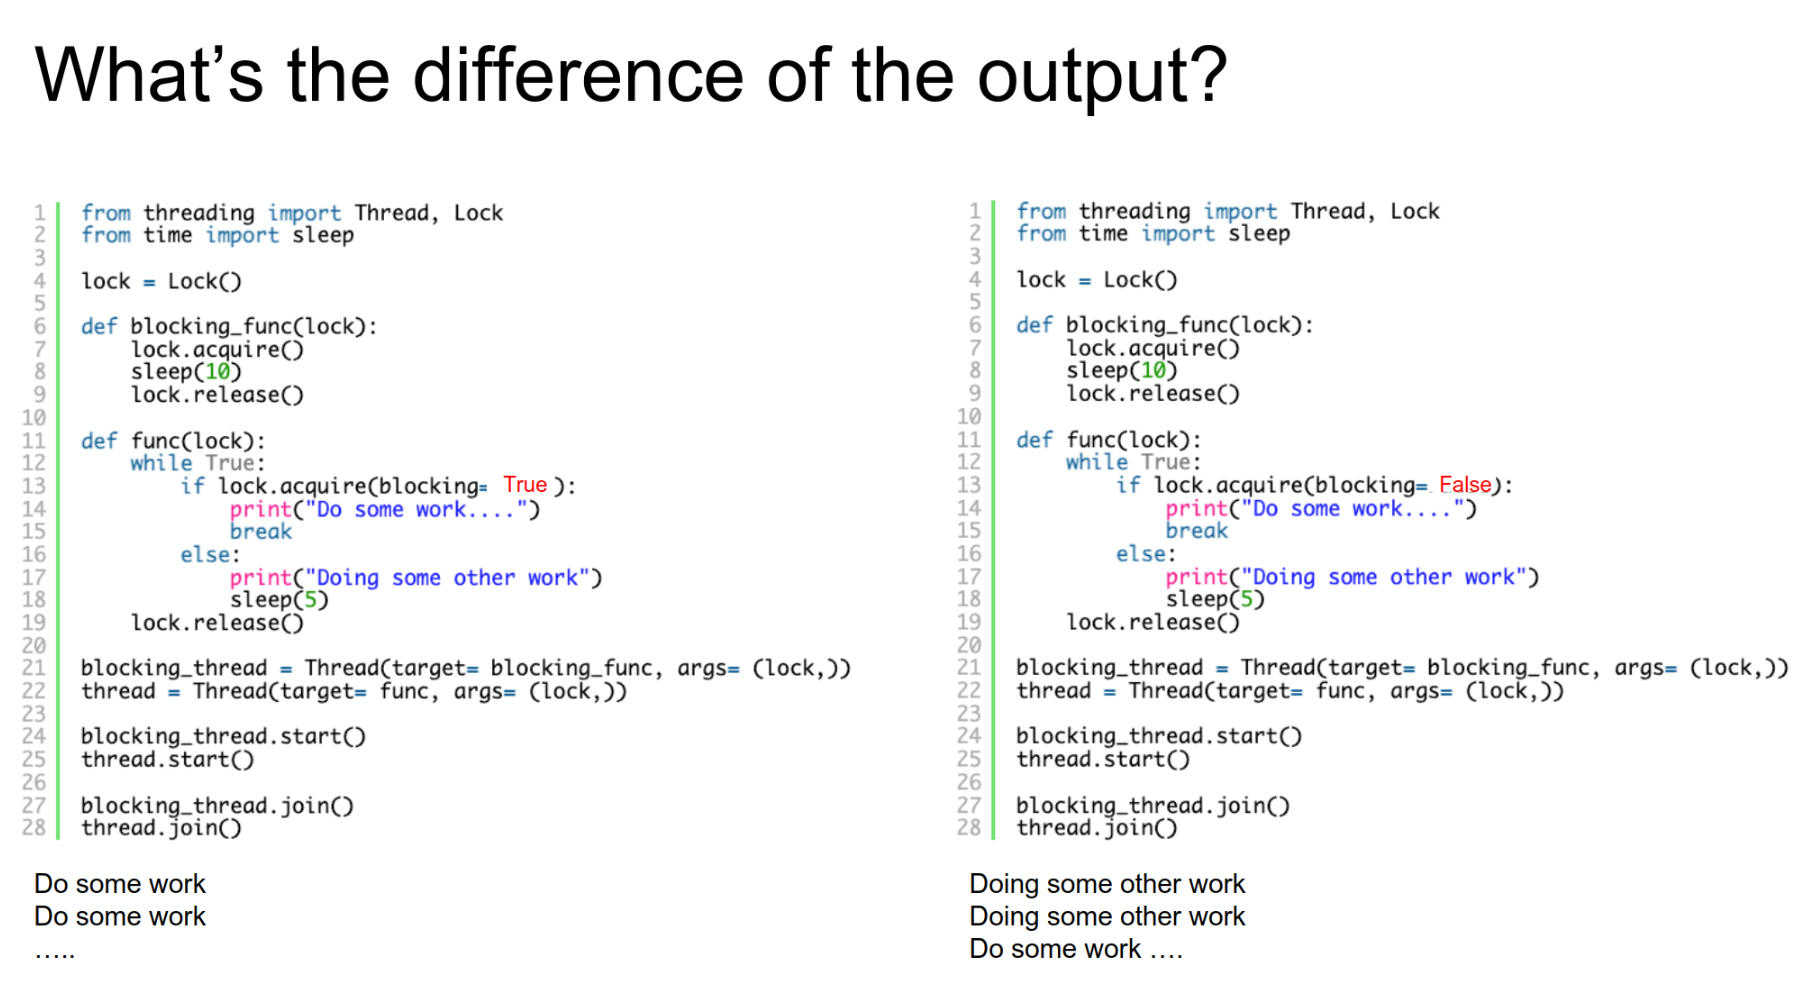


4.Complete the code using the non-blocking acquire function. <br>
$\textbf{d}$ What is the difference between ‘blocking’ and ‘non-blocking’ functions?
<br>
Ans: The difference between ‘blocking’ and ‘non-blocking’ functions is explained using Lab slides and Python library website(https://docs.python.org/3/library/threading.html), as follows. <br> <br>

The quotes from websites states that 
- When invoked with the blocking argument set to $\textbf{True}$ (the default), $\textbf{block until the lock is unlocked}$, e.g., the left hand side snippet below, "lock.acquire(blocking = True)" block untils "blocking_func(lock)" release the lock, then set it to locked and return True, e.g., then "func(lock)" resume to print out "Do some work". <br> <br>

 - When invoked with the blocking argument set to $\textbf{False}$, do not block. If a call with blocking set to True would block, e.g., "lock.acquire(blocking = False)" return False because lock is acquired by " blocking_func(lock)", return False immediately, e.g., executing "else:... ." Until "blocking_func(lock)" released the lock, when set the lock to locked and return True, e.g., "lock.acquire(blocking = False)" is true, and printing "Do some work...".

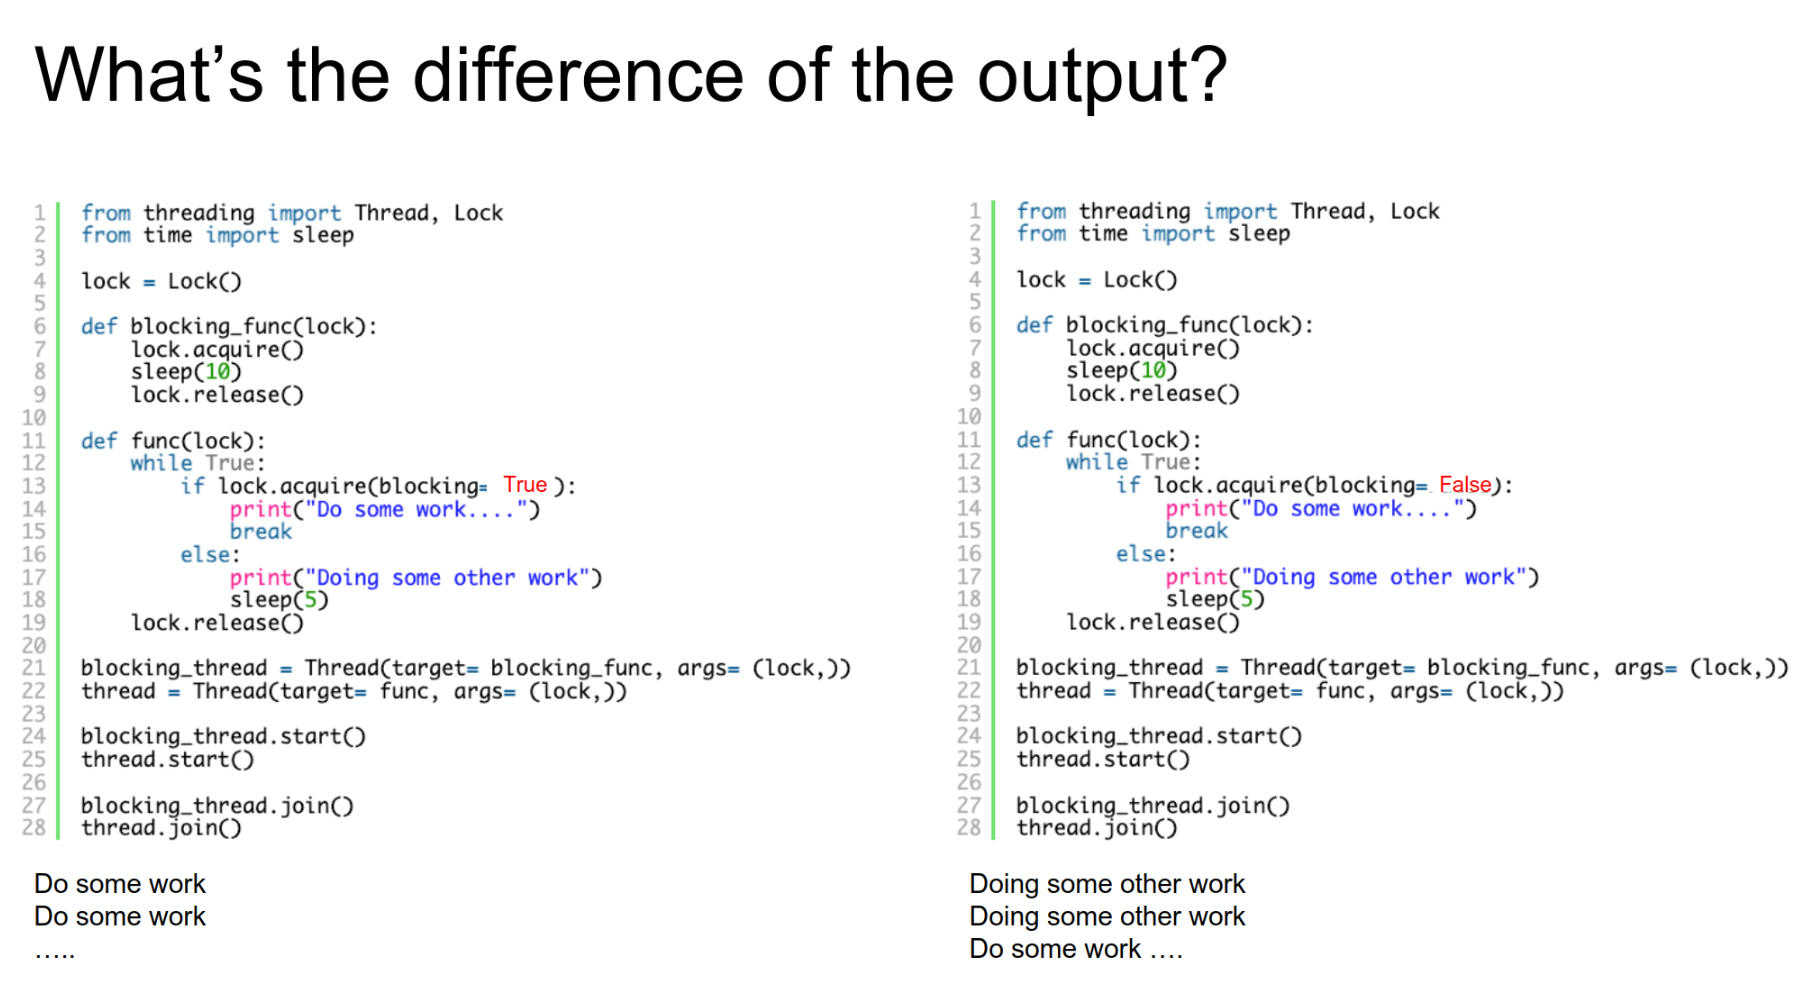
</font>